In [1]:
import numpy as np
from scipy import linalg as la

In [78]:
data = np.array([[7,4,3],
                [4,1,8],
                [6,3,5],
                [8,6,1],
                [8,5,7],
                [7,2,9],
                [5,3,3],
                [9,5,8],
                [7,4,5],
                [8,2,2]])
cov = np.cov(data, rowvar=False)
evals,evecs = la.eig(cov)
print('Eigenvalues:', evals)
print('Eigenvectors:', evecs)

Eigenvalues: [0.74992815+0.j 3.67612927+0.j 8.27394258+0.j]
Eigenvectors: [[-0.70172743  0.69903712 -0.1375708 ]
 [ 0.70745703  0.66088917 -0.25045969]
 [ 0.08416157  0.27307986  0.95830278]]


In [46]:
data = data - data.mean(axis=0)
cov = np.cov(data,rowvar=False)

In [51]:
evals, evecs = la.eig(cov)
print('Eigenvalues:', evals)
print('Eigenvectors:', evecs)

Eigenvalues: [0.74992815+0.j 3.67612927+0.j 8.27394258+0.j]
Eigenvectors: [[-0.70172743  0.69903712 -0.1375708 ]
 [ 0.70745703  0.66088917 -0.25045969]
 [ 0.08416157  0.27307986  0.95830278]]


In [80]:
num_components = 2
sorted_key = np.argsort(evals)[::-1][:num_components]
evals, evecs = evals[sorted_key], evecs[:,sorted_key]
print('Sorted and Selected Eigen Values:', evals)
print('Sorted and Selected Eigen Vectors:', evecs)

data = data - data.mean(axis=0)
principal_components = np.dot(data,evecs)
print('Principal Components:', principal_components)



Sorted and Selected Eigen Values: [8.27394258+0.j 3.67612927+0.j]
Sorted and Selected Eigen Vectors: [[-0.1375708   0.69903712]
 [-0.25045969  0.66088917]
 [ 0.95830278  0.27307986]]
Principal Components: [[-2.15142276 -0.17311941]
 [ 3.80418259 -2.88749898]
 [ 0.15321328 -0.98688598]
 [-4.7065185   1.30153634]
 [ 1.29375788  2.27912632]
 [ 4.0993133   0.1435814 ]
 [-1.62582148 -2.23208282]
 [ 2.11448986  3.2512433 ]
 [-0.2348172   0.37304031]
 [-2.74637697 -1.06894049]]


In [75]:
import pandas as pd
from sklearn.decomposition import PCA

In [76]:
data = np.array([[7,4,3],
                [4,1,8],
                [6,3,5],
                [8,6,1],
                [8,5,7],
                [7,2,9],
                [5,3,3],
                [9,5,8],
                [7,4,5],
                [8,2,2]])

In [77]:
pca_model = PCA(n_components=2)
components = pca_model.fit_transform(data)
components_df = pd.DataFrame(data=components, columns = ['principal_component_1', 'principal_component_2'])
print(components_df)

   principal_component_1  principal_component_2
0               2.151423              -0.173119
1              -3.804183              -2.887499
2              -0.153213              -0.986886
3               4.706518               1.301536
4              -1.293758               2.279126
5              -4.099313               0.143581
6               1.625821              -2.232083
7              -2.114490               3.251243
8               0.234817               0.373040
9               2.746377              -1.068940


In [111]:
data = np.array([[10,11,8,3,2,1],
                [6,4,5,3,2.8,1]])

In [112]:
data = data.T
data.mean(axis=0)

array([5.83333333, 3.63333333])

In [113]:
data = data - data.mean(axis=0)
data

array([[ 4.16666667,  2.36666667],
       [ 5.16666667,  0.36666667],
       [ 2.16666667,  1.36666667],
       [-2.83333333, -0.63333333],
       [-3.83333333, -0.83333333],
       [-4.83333333, -2.63333333]])

In [114]:
cov = np.cov(data,rowvar=False)

In [115]:
cov

array([[18.96666667,  6.48666667],
       [ 6.48666667,  3.12666667]])

In [116]:
evals, evecs = la.eig(cov)

In [117]:
num_components = 1
sorted_key = np.argsort(evals)[::-1][:num_components]
evals, evecs = evals[sorted_key], evecs[:,sorted_key]
print('Sorted and Selected Eigen Values:', evals)
print('Sorted and Selected Eigen Vectors:', evecs)

principal_components = np.dot(data,evecs)
print('Principal Components:', principal_components)

Sorted and Selected Eigen Values: [21.28401224+0.j]
Sorted and Selected Eigen Vectors: [[0.94171069]
 [0.33642381]]
Principal Components: [[ 4.71999755]
 [ 4.98886062]
 [ 2.50015236]
 [-2.8812487 ]
 [-3.89024415]
 [-5.43751769]]


In [126]:
data = np.array([[10,11,8,3,2,1],
                [6,4,5,3,2.8,1]])

data = data.T
pca_model = PCA(n_components=1)
components = pca_model.fit_transform(data)
print(components)

[[-4.71999755]
 [-4.98886062]
 [-2.50015236]
 [ 2.8812487 ]
 [ 3.89024415]
 [ 5.43751769]]


In [127]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [128]:
data = pd.DataFrame({'X':[12,15,18,10,8,9,12,20], 'Y':[6,16,17,8,7,6,9,18]})
wcss_list = []

In [132]:
for i in range(1,6):
    kmeans_model = KMeans(n_clusters = i, random_state = 123)
    kmeans_model.fit(data)
    wcss_list.append(kmeans_model.inertia_)

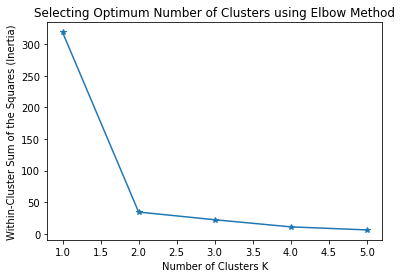

In [134]:
plt.plot(range(1,6), wcss_list, marker='*')
plt.title('Selecting Optimum Number of Clusters using Elbow Method')
plt.xlabel('Number of Clusters K')
plt.ylabel('Within-Cluster Sum of the Squares (Inertia)')
plt.show()

In [135]:
wcss_list

[318.875, 34.266666666666666, 22.1, 10.833333333333334, 6.0]

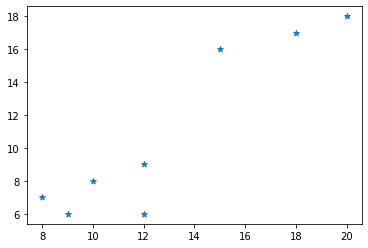

In [150]:
plt.scatter(data['X'], data['Y'], marker='*')
plt.show()

In [144]:
data['ydiff_sq']=(data['Y']-data.mean()['Y'])**2

In [146]:
data['diff_sq_sum'] = data['xdiff_sq']+ data['ydiff_sq']

In [148]:
data['diff_sq_sum'].sum()

318.875

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [152]:
data = pd.DataFrame({'X':[12,15,18,10,8,9,12,20], 'Y':[6,16,17,8,7,6,9,18]})

In [153]:
score_list = []

In [157]:
for i in range(2,6):
    kmeans_model = KMeans(n_clusters=i, random_state = 123)
    kmeans_model.fit(data)
    pred = kmeans_model.predict(data)
    score = silhouette_score(data, pred, metric='euclidean')
    score_list.append(score)

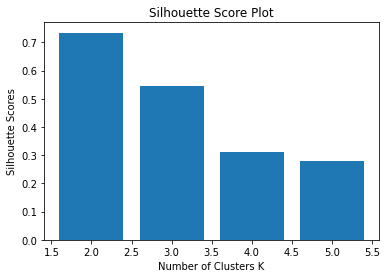

In [155]:
plt.bar(range(2,6), score_list)
plt.title('Silhouette Score Plot')
plt.xlabel('Number of Clusters K')
plt.ylabel('Silhouette Scores')
plt.show()

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [159]:
data = pd.DataFrame({'X':[12,15,18,10,8,9,12,20], 'Y':[6,16,17,8,7,6,9,18]})

In [178]:
num_clusters = 2

In [179]:
km = KMeans(n_clusters = num_clusters)

In [180]:
km.fit(data)

KMeans(n_clusters=2)

In [181]:
pred = km.predict(data)

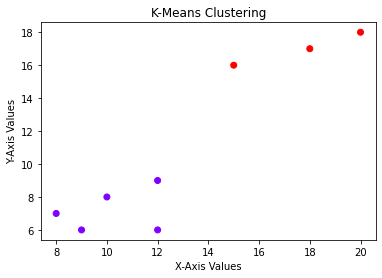

In [190]:
plt.scatter(data.X, data.Y, c=pred, marker='o', cmap = 'rainbow')
plt.title('K-Means Clustering')
plt.xlabel('X-Axis Values')
plt.ylabel('Y-Axis Values')
plt.show()

In [191]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

In [192]:
data = pd.DataFrame({'X':[12,15,18,10,8,9,12,20], 'Y':[6,16,17,8,7,6,9,18]})

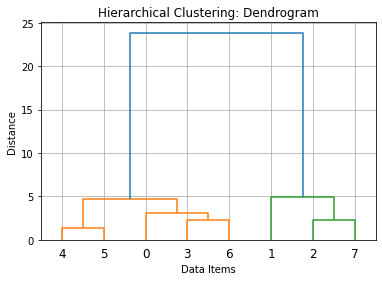

In [200]:
dendrogram_plot = dendrogram(linkage(data,method='ward'))
plt.title('Hierarchical Clustering: Dendrogram')
plt.xlabel('Data Items')
plt.ylabel('Distance')
plt.grid()
plt.show()

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [195]:
data = pd.DataFrame({'X':[12,15,18,10,8,9,12,20], 'Y':[6,16,17,8,7,6,9,18]})

In [196]:
num_clusters = 2

In [210]:
ac = AgglomerativeClustering(n_clusters=num_clusters, linkage='complete')

In [211]:
ac.fit(data)
pred=ac.labels_

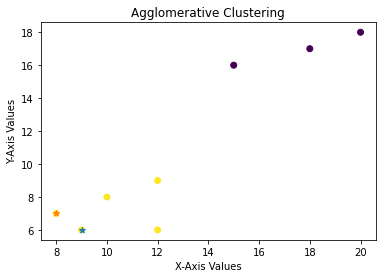

In [225]:
plt.scatter(data.X, data.Y, c=pred, marker='o')
plt.scatter(data.loc[5]['X'], data.loc[5]['Y'], marker='*')
plt.scatter(data.loc[4]['X'], data.loc[4]['Y'], marker='*')
plt.title('Agglomerative Clustering')
plt.xlabel('X-Axis Values')
plt.ylabel('Y-Axis Values')
plt.show()